# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Install Datasets and Upgrade TensorFlow

To ensure we can download the latest version of the `oxford_flowers102` dataset, let's first install both `tensorflow-datasets` and `tfds-nightly`.
* `tensorflow-datasets` is the stable version that is released on a cadence of every few months
* `tfds-nightly` is released every day and has the latest version of the datasets

We'll also upgrade TensorFlow to ensure we have a version that is compatible with the latest version of the dataset.

In [154]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"   
!rm -rf /root/tensorflow_datasets/

rm: cannot remove '/root/tensorflow_datasets/': Permission denied


In [ ]:
%pip --no-cache-dir install --upgrade pip --user

%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tensorflow[and-cuda] --user
%pip --no-cache-dir install --upgrade tensorflow[and-cuda] --user 



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 46.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 39.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 34.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 35.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 4.7 MB/s eta 0:00:0000:0100:07m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 2.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 84.8/166.0 MB 5.9 MB/s eta 0:00:14^C
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 241.5/412.6 MB 89.9 MB/s eta 0:00:02

In [ ]:
%pip --no-cache-dir install --upgrade tensorflow[and-cuda] --user 

After the above installations have finished **be sure to restart the kernel**. You can do this by going to **Kernel > Restart**.

In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import tensorflow_hub as hub
from tensorflow import keras
import tf_keras
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image


# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

2024-06-25 08:51:04.684065: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 08:51:04.688718: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 08:51:04.745433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 08:51:05.867019: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(tf.config.list_physical_devices('GPU'))
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
#GPU Mode not available

[]
tf.Tensor(1042.4138, shape=(), dtype=float32)


In [3]:
# TODO: Make all other necessary imports.
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 TensorFlowHub version:', hub.__version__)
print('\t\u2022 Keras version:', tf_keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')
print('\t\u2022 Running on GPU' if tf.config.list_physical_devices('GPU') else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.16.1
	• TensorFlowHub version: 0.16.1
	• Keras version: 2.16.0
	• GPU device not found. Running on CPU
	• GPU device not found. Running on CPU


2024-06-25 08:51:57.513389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-25 08:51:57.517897: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [7]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()

dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised = True, with_info = True)

# TODO: Create a training set, a validation set and a test set.
training_set, test_set, validation_set = dataset['train'], dataset['test'], dataset['validation']


Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [6]:
print(dataset_info.features['label'].names[72])
dataset_info

water lily


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [8]:
# TODO: Get the number of examples in each set from the dataset info.
num_training_examples  = dataset_info.splits['train'].num_examples
dataset_info.splits['train']
num_test_examples = dataset_info.splits['test'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples

print('\nThere are {:,} images in the test set'.format(num_test_examples))
print('There are {:,} images in the training set'.format(num_training_examples))
print('There are {:,} images in the validation set'.format(num_validation_examples))

# TODO: Get the number of classes in the dataset from the dataset info.
num_of_classes_dataset = dataset_info.features['label'].num_classes
print('There are {:,} classes in our dataset'.format(num_of_classes_dataset))


There are 6,149 images in the test set
There are 1,020 images in the training set
There are 1,020 images in the validation set
There are 102 classes in our dataset


In [9]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('One of the images in our training dataset have shape:', image.shape, 'and label:', label.numpy())

One of the images in our training dataset have shape: (500, 667, 3) and label: 72
One of the images in our training dataset have shape: (500, 666, 3) and label: 84
One of the images in our training dataset have shape: (670, 500, 3) and label: 70


2024-06-25 08:53:48.980309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-06-25 08:53:52.377242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


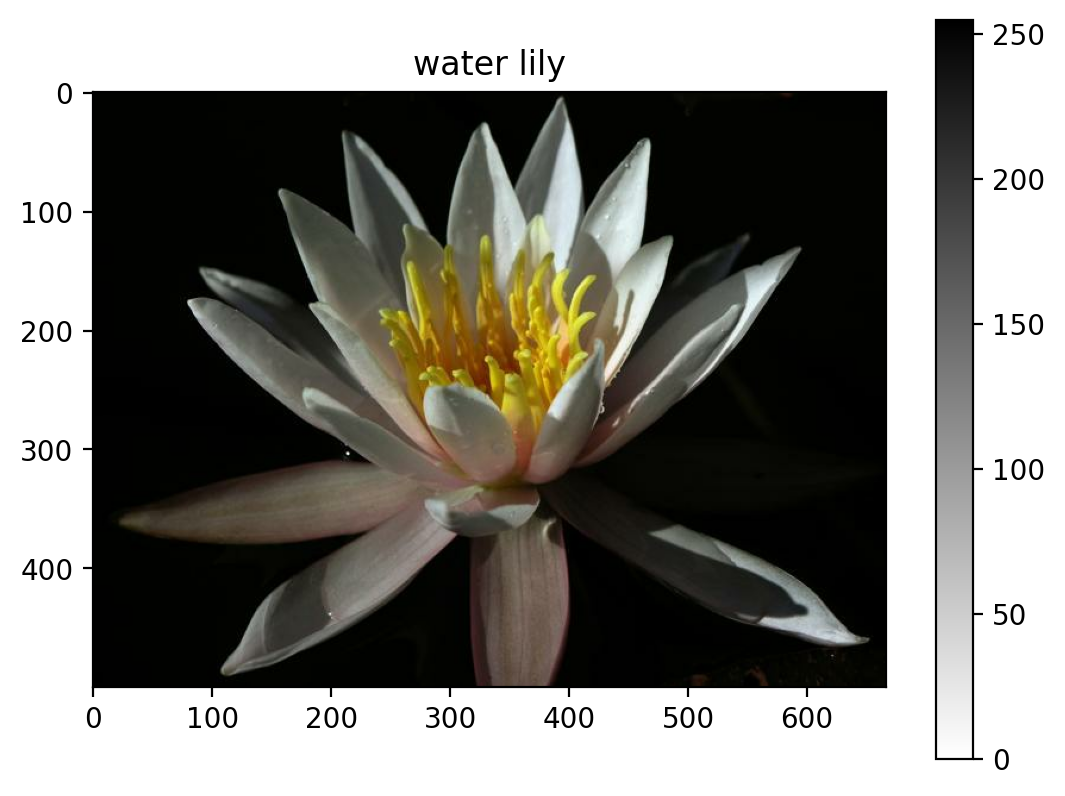

The label of this image is: 72 name: water lily


In [10]:
# TODO: Plot 1 image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap= plt.cm.binary)
plt.title(dataset_info.features['label'].names[label])
plt.colorbar()
plt.show()

print('The label of this image is:', label, 'name:', dataset_info.features['label'].names[label])
# Set the title of the plot to the corresponding image label. 

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [11]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [11]:
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

2024-06-24 15:30:55.333920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


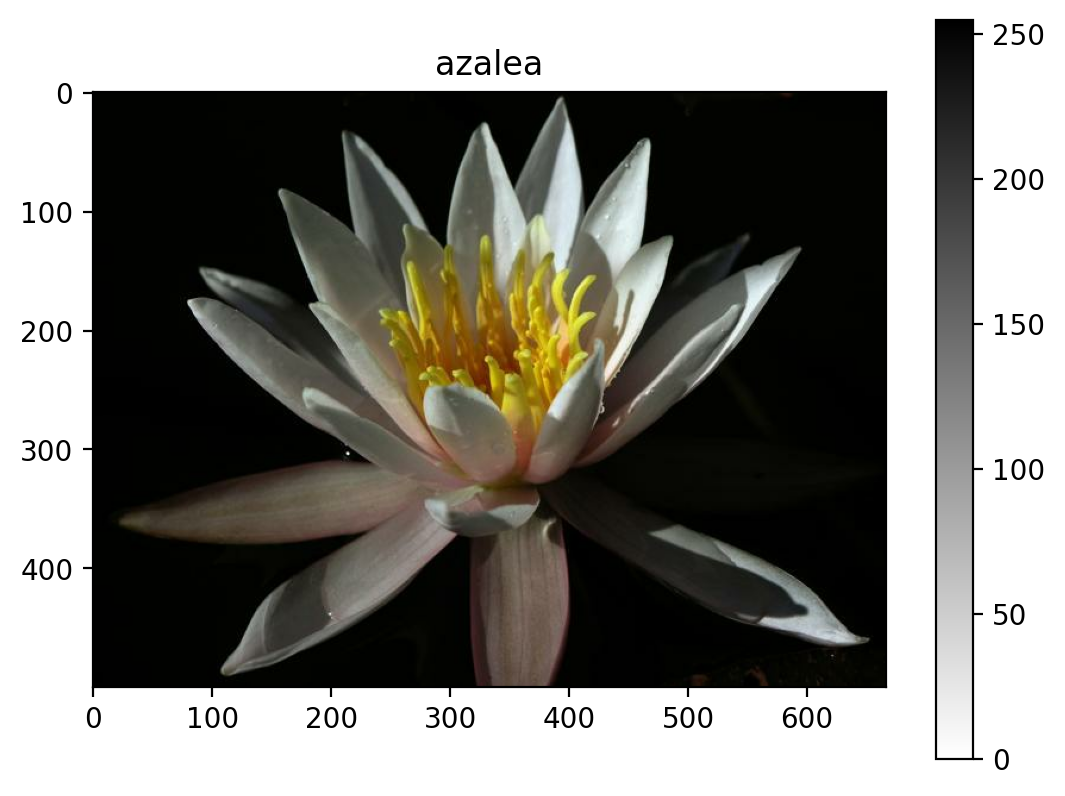

The label of this image is: 72 name: azalea


In [12]:
# TODO: Plot 1 image from the training set. Set the title
# Set the title of the plot to the corresponding image label. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap= plt.cm.binary)
plt.title(class_names[str(label)])
plt.colorbar()
plt.show()

print('The label of this image is:', label, 'name:', class_names[str(label)])

# The name of the title is wrong! Is there a mistake in the json? The name from the previous step is correct if I google the flower.


## Create Pipeline

In [12]:
# TODO: Create a pipeline for each set.
# make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.
batch_size = 32
image_size = 224

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label


training_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

print(training_batches)
print(testing_batches)
print(validation_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [14]:
# URL for the MobileNet model on TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# Load the KerasLayer from TensorFlow Hub
hub_layer = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)

# Create a Sequential model and add the hub layer
model = tf_keras.Sequential([
    hub_layer,
    tf_keras.layers.Dense(255, "relu"),
    tf_keras.layers.Dense(102, "softmax")
])


# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 255)               255510    
                                                                 
 dense_1 (Dense)             (None, 102)               26112     
                                                                 
Total params: 3821887 (14.58 MB)
Trainable params: 281622 (1.07 MB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [15]:
print('Is there a GPU Available:', tf.test.is_gpu_available())
#Since the GPU is not working, I keep the training time short and cannot reach an accuracy of 70%.

Is there a GPU Available: False


2024-06-24 15:31:09.570102: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-24 15:31:09.572557: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# TODO: Build and train your network.
#load pre trained network

## Solution
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 2


# Stop training when there is no improvement in the validation loss for 1 consecutive epochs
early_stopping = tf_keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

# Save the Model with the lowest validation loss

my_callbacks = [
    tf_keras.callbacks.EarlyStopping(patience=2),
    tf_keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras')
]
    
history = model.fit(training_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches,
                    callbacks=my_callbacks)

In [ ]:
model.save(filepath='model1.keras')

In [13]:
#Kernel crashed during training, therefore last saved model is taken from this point on.
reloaded_Model = tf_keras.models.load_model('model1.keras',custom_objects={'KerasLayer':hub.KerasLayer})
reloaded_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 255)               255510    
                                                                 
 dense_1 (Dense)             (None, 102)               26112     
                                                                 
Total params: 3821887 (14.58 MB)
Trainable params: 281622 (1.07 MB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [14]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
loss, accuracy = reloaded_Model.evaluate(training_batches)
print('\nLoss on the training Set: {:,.3f}'.format(loss))
print('Accuracy on the training Set: {:.3%}'.format(accuracy))

loss, accuracy = reloaded_Model.evaluate(validation_batches)
print('\nLoss on the validation Set: {:,.3f}'.format(loss))
print('Accuracy on the validation Set: {:.3%}'.format(accuracy))

32/32 [==============================] - 101s 3s/step - loss: 0.5114 - accuracy: 0.9049

Loss on the training Set: 0.511
Accuracy on the training Set: 90.490%
32/32 [==============================] - 85s 3s/step - loss: 1.4381 - accuracy: 0.6382

Loss on the validation Set: 1.438
Accuracy on the validation Set: 63.824%


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [15]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = reloaded_Model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


193/193 [==============================] - 499s 3s/step - loss: 1.6012 - accuracy: 0.6034

Loss on the TEST Set: 1.601
Accuracy on the TEST Set: 60.335%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.
# Allready done (see on top, model.save(filepath='model1.keras')


## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# TODO: Load the Keras model

# Allready done (see on top)
#reloaded_Model = tf_keras.models.load_model('model1.keras',custom_objects={'KerasLayer':hub.KerasLayer})

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
###
#JUST FOR Testing!
###

pic = Image.open('test_images/cautleya_spicata.jpg')
pic.show
classes_numbers = []
classes_names = []
probs = []

print(img)
#image = np.asarray(img)
picture_tf = tf.cast(pic, tf.float32)
picture_tf = tf.image.resize(picture_tf, (224, 224))
picture_tf /= 255    
picture_tf = picture_tf.numpy()
picture_tf = np.expand_dims(picture_tf, 0)
print(picture_tf.shape)

prediction = reloaded_Model.predict(picture_tf)
print(prediction)
print(prediction.shape)


sorted_indices = np.argsort(prediction, axis=1)
print("Indizes, wenn nach zweiter Reihe sortiert wird",sorted_indices)
largest_n_indices = sorted_indices[:, -2:]
print(largest_n_indices)
for indice in largest_n_indices:
    for n in indice:
        print(n)
        #print(class_names[str(n)])
        classes_numbers.append(n)
        classes_names.append(class_names[str(n)])
        probs.append(prediction[:,n])
        
print(classes_numbers, classes_names, probs)
        

In [18]:
# TODO: Create the process_image function
image_path = "test_images/cautleya_spicata.jpg"
model_path = "model1.keras"
n = 5

def predict(image_path, model, top_k):
    #Image loading
    img = Image.open(image_path)
    image = np.asarray(img)
    classes_numbers = [] #Numbers of top_k predicted flower labels
    classes_names = [] #Names of top_k predicted flower labels
    probs = [] #propabilities of top_k predicted labels
       
    #Preprocessing
    image = process_image(image)
    #print(image.shape)
    
    #Prediction
    reloaded_Model = tf_keras.models.load_model('model1.keras',custom_objects={'KerasLayer':hub.KerasLayer})
    prediction = reloaded_Model.predict(image)
    
    #Post Processing
    sorted_indices = np.argsort(prediction, axis=1)
    largest_n_indices = sorted_indices[:, -top_k:]
    
    #Find according label number and name
    for indice in largest_n_indices:
        for indice1 in indice:
            classes_numbers.append(indice1)
            #classes_names.append(class_names[str(indice1)]) # Since there is a missmatch between number and names in the
            #the flower dict, as described above therefore, the names are taken from the dataset.
            classes_names.append(dataset_info.features['label'].names[indice1])
            probs.append(prediction[:,indice1])
            
        
    return np.squeeze(np.array(probs)), classes_numbers, classes_names


probs, classes_numbers, classes_names  = predict(image_path, model_path, n)

print("The propabilities for the ",n," most likely matched flowers are: ", probs, "\n")
print("The label numbers for the ",n," most likely matched flowers are: ", classes_numbers, "\n")
print("The label names for the ",n," most likely matched flowers are: ", classes_names, "\n")

1/1 [==============================] - 1s 828ms/step
The propabilities for the  5  most likely matched flowers are:  [0.02658678 0.03801198 0.05099788 0.05728244 0.6694157 ] 

The label numbers for the  5  most likely matched flowers are:  [45, 38, 8, 37, 60] 

The label names for the  5  most likely matched flowers are:  ['wallflower', 'siam tulip', 'monkshood', 'great masterwort', 'cautleya spicata'] 



In [17]:
def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image /= 255
    image = image.numpy()
    image = np.expand_dims(image, 0)
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

(224, 224, 3)


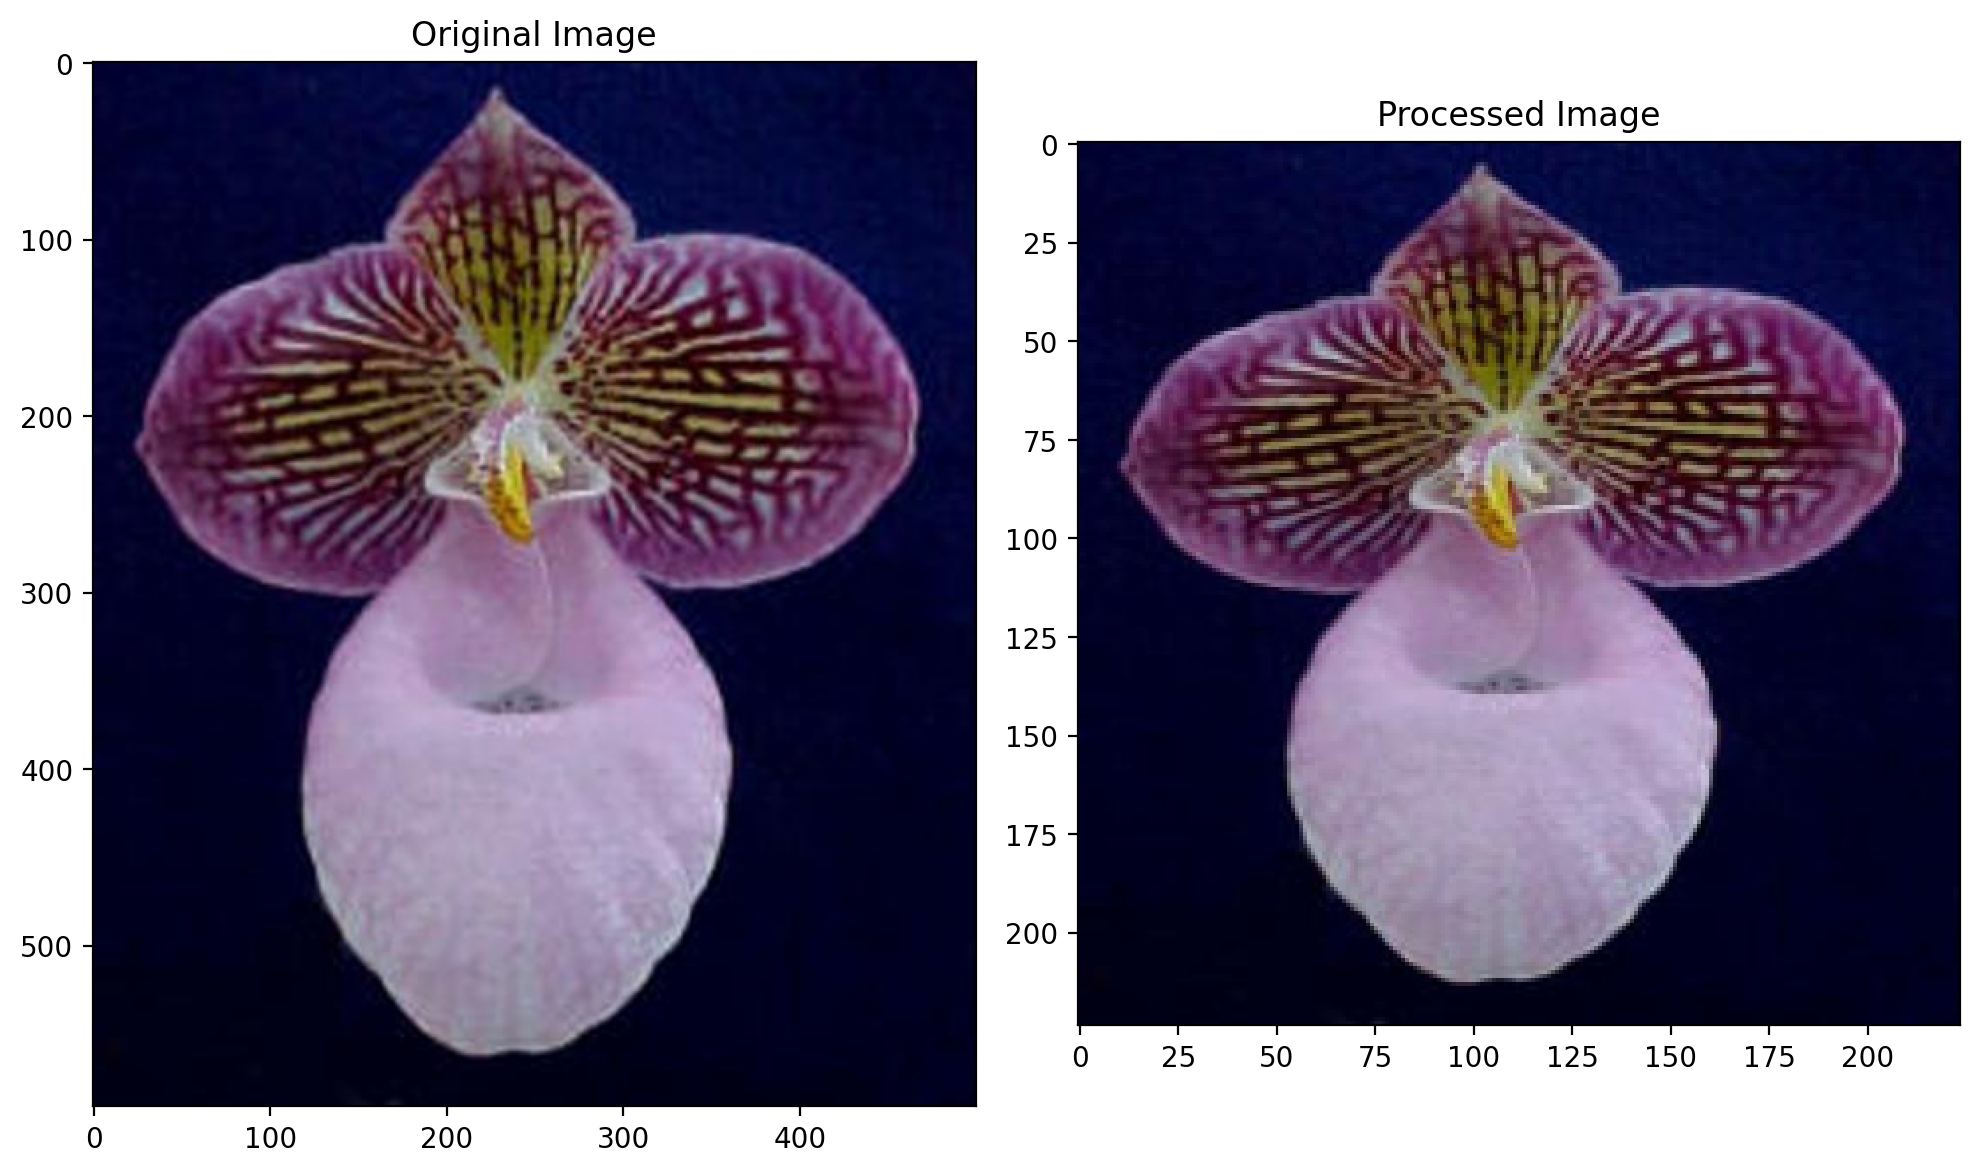

In [19]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)
processed_test_image = np.squeeze(processed_test_image, axis=0)
print(processed_test_image.shape)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [15]:
# TODO: Create the predict function

#Was allready written above. Super unclear description of the tasks to do. Can be improved!

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

## Even that the model accuracy is at ~60% the prediction is quite good!

1/1 [==============================] - 1s 675ms/step


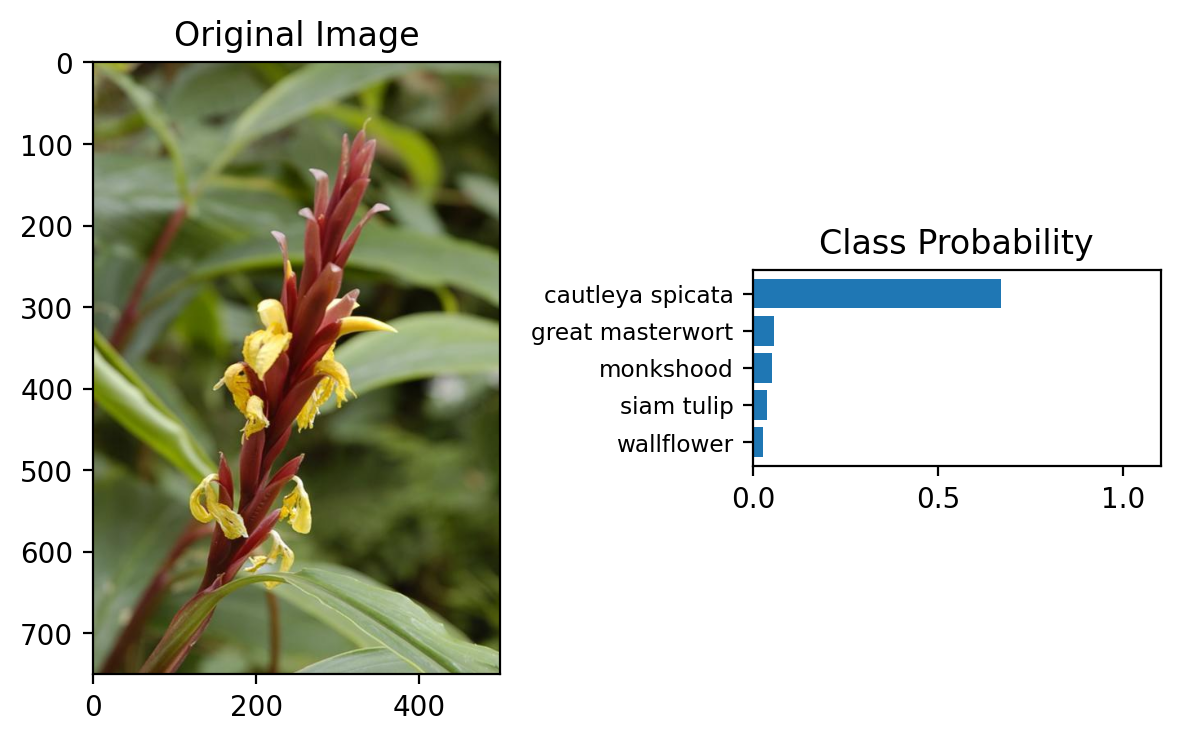

In [20]:
# TODO: Plot the input image along with the top 5 classes

image_path = './test_images/cautleya_spicata.jpg'
model_path = "model1.keras"
n = 5
probs, classes_numbers, classes_names = predict(image_path, model_path, n)

im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)
processed_test_image = np.squeeze(processed_test_image, axis=0)
    
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')

ax2.barh(np.arange(n), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels(classes_names, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

1/1 [==============================] - 1s 756ms/step


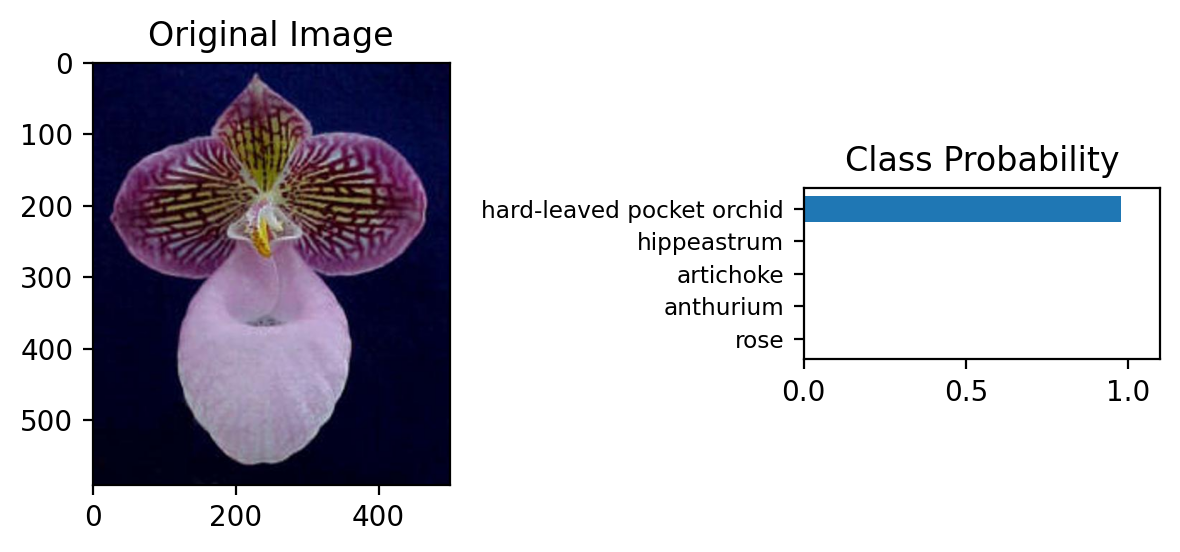

In [21]:
# TODO: Plot the input image along with the top 5 classes

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
model_path = "model1.keras"
n = 5
probs, classes_numbers, classes_names = predict(image_path, model_path, n)

im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)
processed_test_image = np.squeeze(processed_test_image, axis=0)
    
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')

ax2.barh(np.arange(n), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(n))
ax2.set_yticklabels(classes_names, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

1/1 [==============================] - 1s 800ms/step


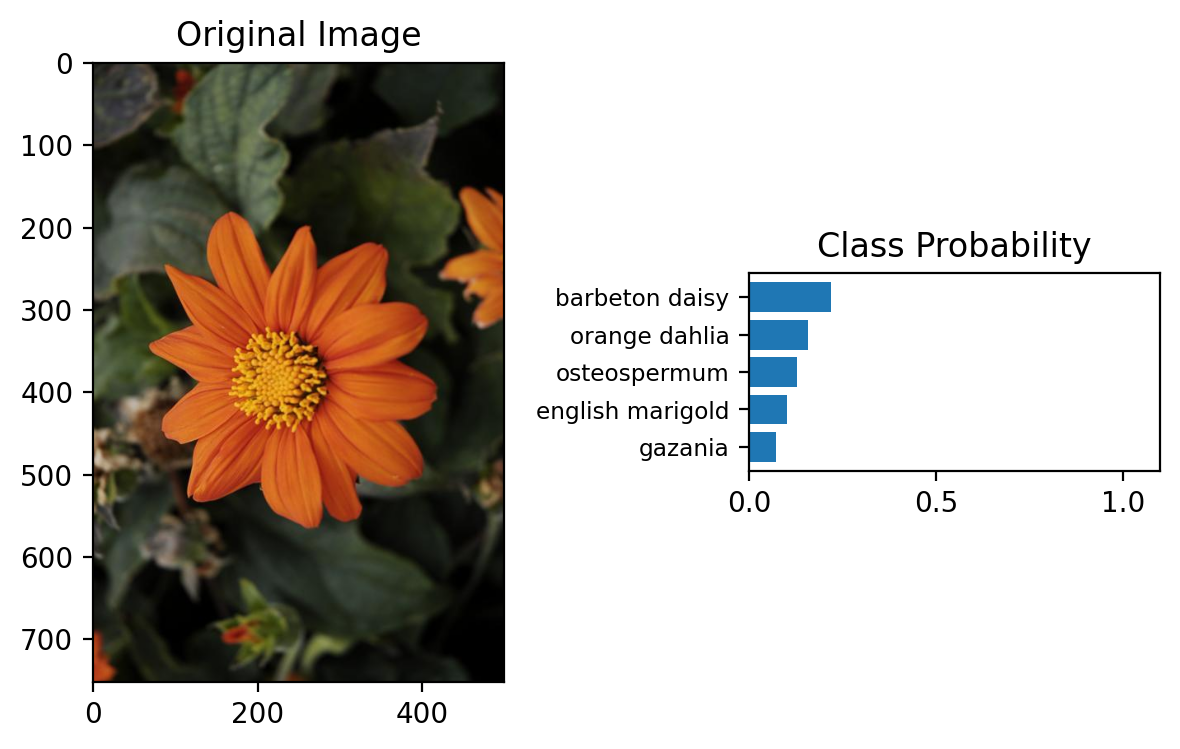

In [22]:
# TODO: Plot the input image along with the top 5 classes

image_path = './test_images/orange_dahlia.jpg'
model_path = "model1.keras"
n = 5
probs, classes_numbers, classes_names = predict(image_path, model_path, n)

im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)
processed_test_image = np.squeeze(processed_test_image, axis=0)
    
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')

ax2.barh(np.arange(n), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(n))
ax2.set_yticklabels(classes_names, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

1/1 [==============================] - 1s 742ms/step


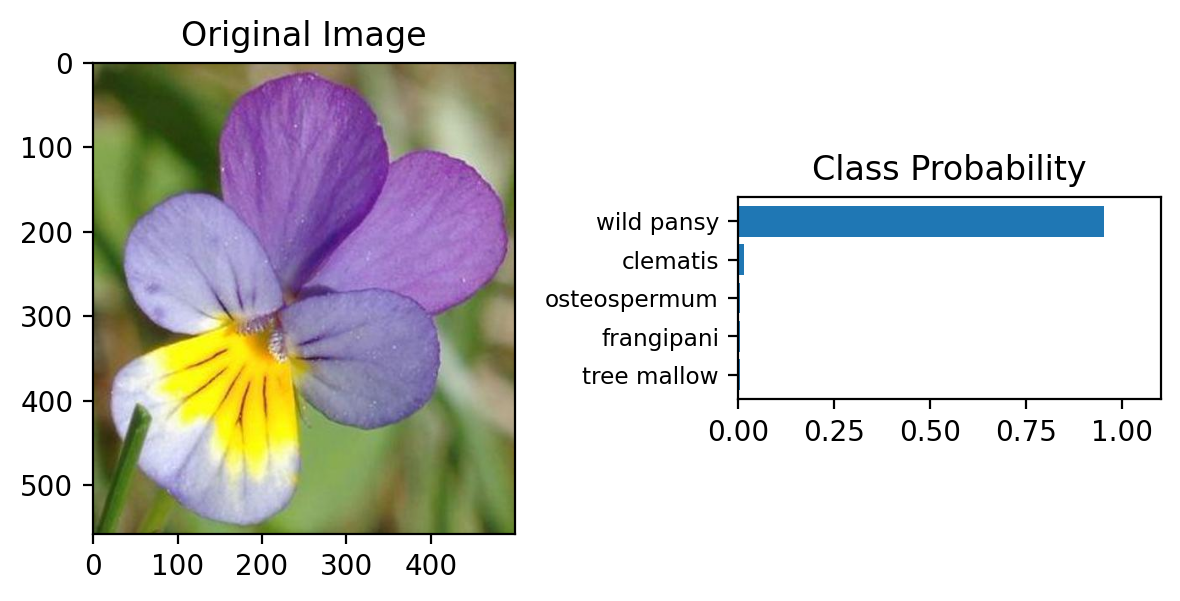

In [23]:
# TODO: Plot the input image along with the top 5 classes

image_path = './test_images/wild_pansy.jpg'
model_path = "model1.keras"
n = 5
probs, classes_numbers, classes_names = predict(image_path, model_path, n)

im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)
processed_test_image = np.squeeze(processed_test_image, axis=0)
    
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')

ax2.barh(np.arange(n), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(n))
ax2.set_yticklabels(classes_names, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()
